In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np

file_path = "kc1-class-level-numericdefect.arff"
data, meta = arff.loadarff(file_path)

df = pd.DataFrame(data)

df['NUMDEFECTS'] = np.where(df['NUMDEFECTS'] > 0, 1, 0)

df.to_csv("kc1.csv", index=False)
print("Το αρχείο αποθηκεύτηκε ως kc1.csv")

Το αρχείο αποθηκεύτηκε ως kc1.csv


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

df=pd.read_csv("kc1.csv")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)

y_pred = classifier_log.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

[[17  4]
 [ 2  6]]
79.31%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

[[17  4]
 [ 1  7]]
82.76%


Κέντρα των clusters:
[[-3.85113919 -0.6546313 ]
 [ 4.17074321 -0.34161717]
 [ 1.66293351 11.88565764]
 [18.25345833 -1.25252564]]


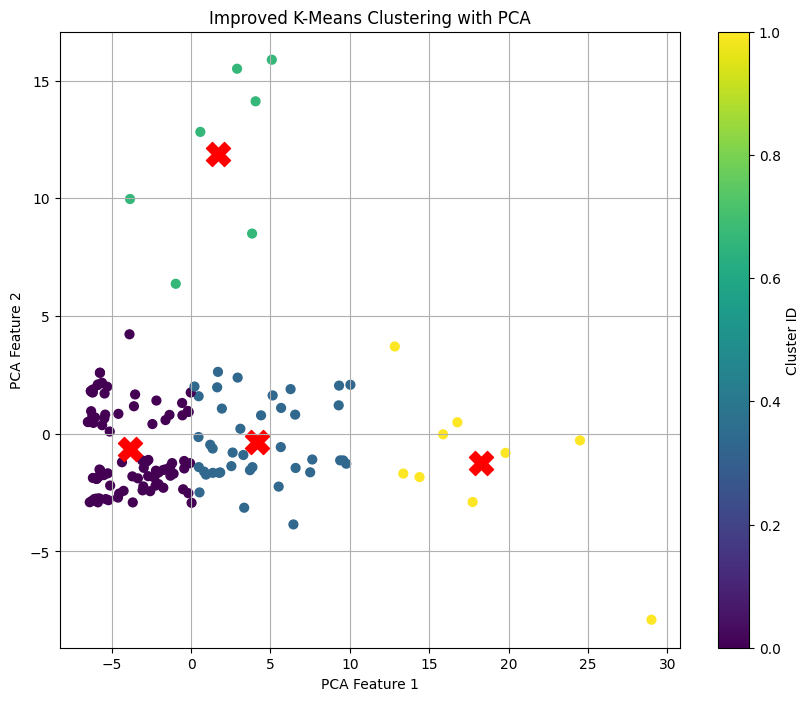

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10 ,random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

print("Κέντρα των clusters:")
print(kmeans.cluster_centers_)


plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, marker='X')
plt.title("Improved K-Means Clustering with PCA")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.grid(True)
plt.colorbar(label="Cluster ID")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=0)

parameters = {'C': [0.1, 0.5, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1, 0.5]}

grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

best_parameters = grid.best_params_
print(best_parameters)

best_model = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], random_state=0)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

{'C': 0.5, 'gamma': 0.01}
75.86%


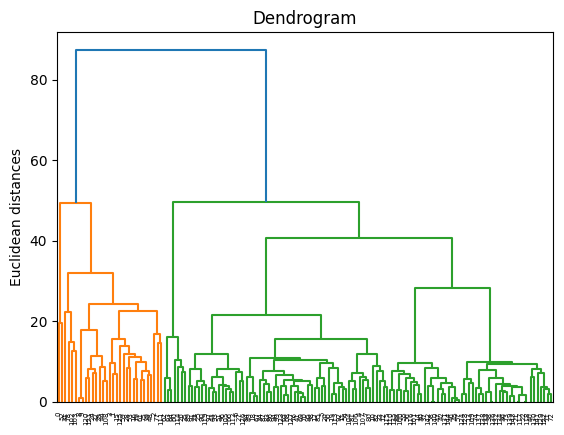

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

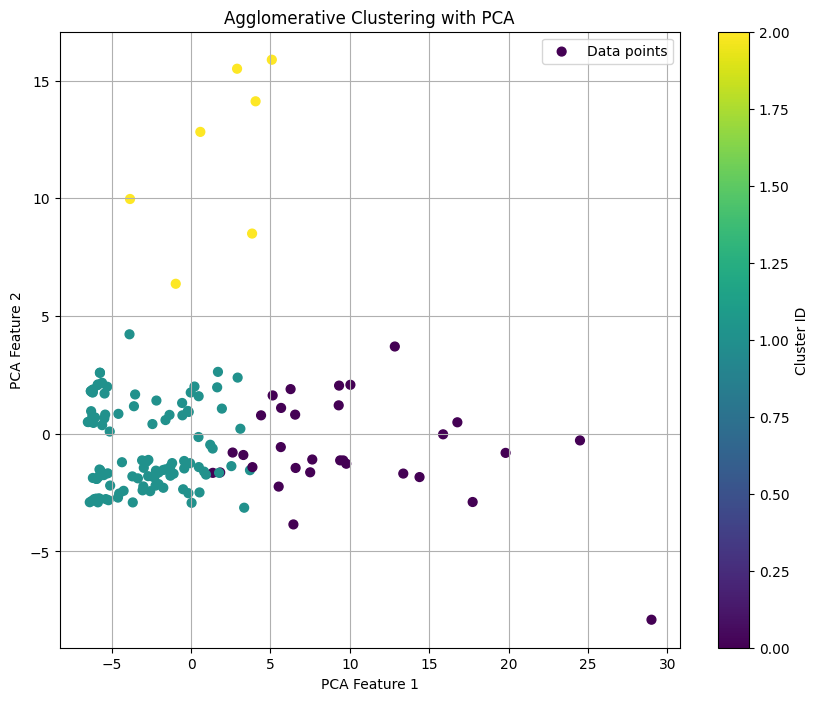

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hc, cmap='viridis', s=40, label="Data points")
plt.title("Agglomerative Clustering with PCA")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.grid(True)
plt.colorbar(label="Cluster ID")
plt.legend()
plt.show()